In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate

In [138]:

df_data=pd.read_table('crystal_data.txt',sep=" ",skiprows=4)
print(df_data.iloc[:6,:])

   Generation         x         y     theta       psi       phi  lattice_sum  \
0           0  0.303905  0.984684  0.476975  0.953252  1.546730     4.772820   
1           0 -0.719512  1.000000 -1.171550  1.897300  0.226798     0.883263   
2           0  0.419242  1.000000  1.470250  0.961078  0.235614     1.918580   
3           0  0.019298  1.000000  0.029752  1.330280  0.004597    18.319900   
4           0  0.251700  1.000000  0.468213  1.206760  0.089378     8.662420   
5           0  0.934689  0.426058  1.468170  1.478930  0.668923     1.332860   

        fitness  
0  6.406340e-07  
1  1.613500e-01  
2  5.889720e-03  
3  9.878670e-26  
4  2.543260e-12  
5  3.832110e-02  


/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [139]:
#split in Generations
generations=[]
count=0
before=0
tmp_list=[]
for i,gen in enumerate(df_data["Generation"]):
    if gen!=count:
        generations.append(df_data.iloc[before:i-1,:])
        before=i-1
        count+=1
print(generations[9]['fitness'].max())

1.27747


In [140]:
#find fittest per Generation
fitest=[]
best_sol_x=[]
best_sol_y=[]
for i,gen in enumerate(generations):
    fitest.append(generations[i]['fitness'].max())
    for j,ele in enumerate(generations[i]['fitness']):
        if (generations[i]['fitness'].iloc[j]==fitest[i]):
            best_sol_x.append(generations[i]['x'].iloc[j])
            best_sol_y.append(generations[i]['y'].iloc[j])

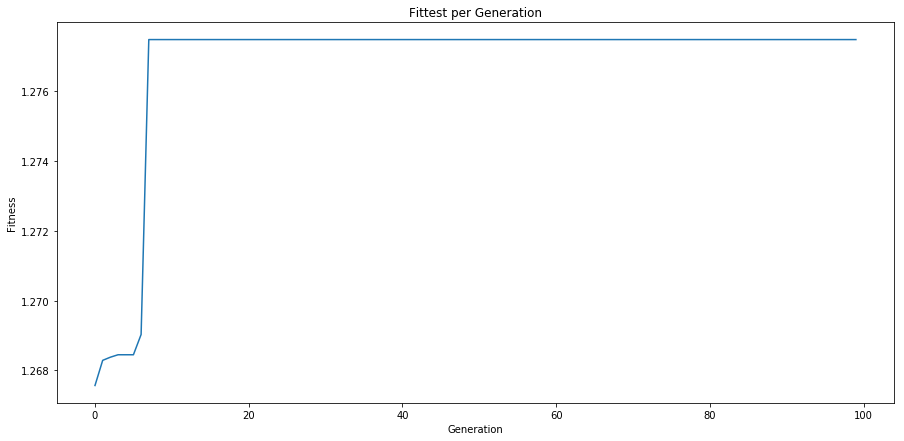

In [141]:
plt.figure(figsize=(15,7))
plt.plot(fitest)
#plt.yscale('log')
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Fittest per Generation')
plt.savefig('Fittest.png')